# POKEMON DATABASE - DATA ANALYSIS

> Neste notebook, vamos explorar e analisar uma base de dados completa de Pokémon, extraída de fontes públicas e enriquecida com informações adicionais, como atributos de batalha, habilidades, fraquezas e locais de captura.

O objetivo deste trabalho é aplicar técnicas de análise de dados para responder perguntas relevantes, identificar padrões, tendências e insights que possam ser úteis para jogadores, pesquisadores ou entusiastas do universo Pokémon.

Ao longo do notebook, você encontrará:
- Bibliotecas utilizadas
- Extração, limpeza e preparação dos dados 
- Dicionário de dados
- Análise de qualidade e exploratória dos dados
- Visualizações para facilitar a compreensão dos dados
- Descoberta de relações entre tipos, habilidades, fraquezas e desempenho
- Insights sobre distribuição, raridade e características marcantes dos Pokémon

## Bibliotecas Utilizadas


Para realizar a análise e manipulação dos dados neste notebook, utilizamos as seguintes bibliotecas Python:

- **pandas**  
  Utilizada para manipulação, limpeza e análise de dados em formato tabular (DataFrames). É a principal biblioteca para análise de dados estruturados em Python.

- **beautifulsoup4**  
  Usada para fazer parsing e extração de informações de arquivos HTML, permitindo coletar dados de páginas web de forma eficiente.

- **requests**  
  Permite realizar requisições HTTP para acessar APIs e baixar dados diretamente da internet, como a PokeAPI.

- **plotly**  
  Biblioteca para criação de visualizações interativas e dinâmicas, como gráficos e tabelas, facilitando a exploração visual dos dados.

- **nbformat**  
  Necessária para o funcionamento correto de notebooks Jupyter, especialmente para renderização de gráficos interativos (como os do Plotly) dentro do ambiente do notebook.


In [1]:

%pip install pandas
%pip install beautifulsoup4
%pip install requests
%pip install plotly
%pip install nbformat
%pip install scipy
%pip install kaleido
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Extração, Limpeza e Preparação dos Dados

O processo de construção da base de dados utilizada nesta análise envolveu diversas etapas de extração, enriquecimento e preparação dos dados, conforme descrito abaixo:

- **Extração Inicial:**  
  A base principal de Pokémon foi extraída do site oficial [Pokédex Pokémon](https://www.pokemon.com/br/pokedex), contendo informações básicas de cada espécie.

- **Enriquecimento com Localização de Captura:**  
  Utilizou-se a [PokeAPI](https://pokeapi.co/) para complementar a base, adicionando as localizações de captura de cada Pokémon, tornando a análise mais rica e detalhada.

- **Resgate de Dados de Status:**  
  Os dados de status dos Pokémon (HP, Attack, Defense, Sp. Attack, Sp. Defense e Speed) foram extraídos do site [Pokémon Database](https://pokemondb.net/pokedex/all) utilizando a biblioteca BeautifulSoup para leitura do HTML.  
  - Para Pokémon com diferentes formas, foi considerado o status da forma padrão/normal.

- **Normalização dos valores:**  
  Para garantir a consistência e facilitar a análise, os valores numéricos de altura (`height`) e peso (`weight`) dos Pokémon foram convertidos para o tipo `float`, representando metros e quilogramas, respectivamente. Além disso, todos os nomes, tipos, habilidades e fraquezas foram padronizados para letras minúsculas, evitando duplicidade de categorias devido a diferenças de capitalização.

- **Codificação de Dados Categóricos:**  
  Para lidar com atributos que possuem múltiplos valores (como habilidades, tipos, fraquezas e locais de captura), foi aplicada a técnica de One Hot Encoding, facilitando a análise e a modelagem dos dados.

Essas etapas garantem uma base de dados consolidada, limpa e pronta para análises mais profundas e visualizações

In [2]:
import json
import pandas as pd

# Ler o JSON extraindo do site oficial da pokedex
with open('./assets/pokedex-db.json', "r", encoding="utf-8") as f:
    pokedex_data = json.load(f)

# Converter para DataFrame
df = pd.DataFrame(pokedex_data)

print(f"Tamanho do DataFrame: {df.shape}")
print(f"Colunas do DataFrame: {df.columns.tolist()}")

Tamanho do DataFrame: (1025, 14)
Colunas do DataFrame: ['abilities', 'detailPageURL', 'weight', 'weakness', 'number', 'height', 'collectibles_slug', 'featured', 'slug', 'name', 'ThumbnailAltText', 'ThumbnailImage', 'id', 'type']


In [3]:

# Removendo colunas desnecessárias se existirem
if 'number' in df.columns:
    df.drop(columns=['number'], inplace=True)
if 'detailPageURL' in df.columns:
    df.drop(columns=['detailPageURL'], inplace=True)
if 'collectibles_slug' in df.columns:
    df.drop(columns=['collectibles_slug'], inplace=True)
if 'featured' in df.columns:
    df.drop(columns=['featured'], inplace=True)
if 'slug' in df.columns:
    df.drop(columns=['slug'], inplace=True)
if 'ThumbnailAltText' in df.columns:
    df.drop(columns=['ThumbnailAltText'], inplace=True)
if 'ThumbnailImage' in df.columns:
    df.drop(columns=['ThumbnailImage'], inplace=True)
    
# Converter valores das colunas de tipo string para minusculo
df['name'] = df['name'].str.lower()
for col in ['type', 'abilities', 'weakness']:
    df[col] = df[col].apply(lambda x: [i.lower() for i in x] if isinstance(x, list) else x)
     
print(f"Tamanho do DataFrame após remoção de colunas: {df.shape}\n\n")
print(df.head(5))
        

Tamanho do DataFrame após remoção de colunas: (1025, 7)


    abilities  weight                      weakness  height        name  id  \
0  [overgrow]     6.9  [fire, ice, flying, psychic]     0.7   bulbasaur   1   
1  [overgrow]    13.0  [fire, ice, flying, psychic]     1.0     ivysaur   2   
2  [overgrow]   100.0  [fire, ice, flying, psychic]     2.0    venusaur   3   
3     [blaze]     8.5         [water, ground, rock]     0.6  charmander   4   
4     [blaze]    19.0         [water, ground, rock]     1.1  charmeleon   5   

              type  
0  [grass, poison]  
1  [grass, poison]  
2  [grass, poison]  
3           [fire]  
4           [fire]  


In [4]:
from bs4 import BeautifulSoup
import json

# Abra e leia o arquivo HTML
with open('./assets/pokemondb-net.html', 'r', encoding='utf-8') as f:
    html = f.read()

soup = BeautifulSoup(html, 'html.parser')

# Encontre a tabela com id="pokedex"
table = soup.find('table', {'id': 'pokedex'})

# Pegue o cabeçalho da tabela
headers = [th.get_text(strip=True) for th in table.find('thead').find_all('th')]

# Descubra o índice da coluna 'Type'
type_index = headers.index('Type')

# Remova 'Type' dos headers
headers.pop(type_index)

# Extraia os dados das linhas
data = []
for row in table.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    if not cols:
        continue

    # Extrai os textos das colunas, exceto 'Type'
    col_texts = [td.get_text(strip=True) for td in cols]
    col_texts.pop(type_index)

    # Tratamento especial para a coluna 'Name'
    name_td = cols[headers.index('Name')]
    name_a = name_td.find('a')
    name = name_a.get_text(strip=True) if name_a else name_td.get_text(strip=True)
    form_small = name_td.find('small')
    form = form_small.get_text(strip=True) if form_small else None

    # Substitui o valor da coluna 'Name' pelo nome extraído
    col_texts[headers.index('Name')] = name

    # Cria o dicionário
    item = dict(zip(headers, col_texts))
    if form:
        item['form'] = form
    data.append(item)
    
# Remover os pokemons repetidos mantendo apenas o que primeiro aparece na lista
unique_data = []
seen_ids = set()
for item in data:
    poke_id = item.get("#")
    if poke_id and poke_id not in seen_ids:
        unique_data.append(item)
        seen_ids.add(poke_id)
 
# Salvar em um arquivo JSON
with open('./outputs/pokemon-stats-db.json', 'w', encoding='utf-8') as f:
    json.dump(unique_data, f, ensure_ascii=False, indent=4)

# Concatenar os dados de 'attack', 'defense', 'hp', 'sp_atk', 'sp_def', 'speed' ao DataFrame df comparando o "id" do df com o "#" do unique_data
for item in unique_data:
    poke_id = item.get("#")
    if poke_id and poke_id.isdigit():
        poke_id = int(poke_id)

        df.loc[df['id'] == poke_id, ['attack', 'defense', 'hp', 'sp_atk', 'sp_def', 'speed', 'total']] = [
            int(item.get('Attack')),
            int(item.get('Defense')),
            int(item.get('HP')),
            int(item.get('Sp. Atk')),
            int(item.get('Sp. Def')),
            int(item.get('Speed')),
            int(item.get('Total'))
        ]
        
    
# Ordenando colunas
df = df[['id', 'name', 'type', 'height', 'weight', 'attack', 'defense', 'hp', 'sp_atk', 'sp_def', 'speed', 'total', 'abilities', 'weakness']]
         
print(f"Tamanho do DataFrame após atualização: {df.shape}\n\n")
print(df.head())  # Exibir as primeiras linhas do DataFrame atualizado

Tamanho do DataFrame após atualização: (1025, 14)


   id        name             type  height  weight  attack  defense    hp  \
0   1   bulbasaur  [grass, poison]     0.7     6.9    49.0     49.0  45.0   
1   2     ivysaur  [grass, poison]     1.0    13.0    62.0     63.0  60.0   
2   3    venusaur  [grass, poison]     2.0   100.0    82.0     83.0  80.0   
3   4  charmander           [fire]     0.6     8.5    52.0     43.0  39.0   
4   5  charmeleon           [fire]     1.1    19.0    64.0     58.0  58.0   

   sp_atk  sp_def  speed  total   abilities                      weakness  
0    65.0    65.0   45.0  318.0  [overgrow]  [fire, ice, flying, psychic]  
1    80.0    80.0   60.0  405.0  [overgrow]  [fire, ice, flying, psychic]  
2   100.0   100.0   80.0  525.0  [overgrow]  [fire, ice, flying, psychic]  
3    60.0    50.0   65.0  309.0     [blaze]         [water, ground, rock]  
4    80.0    65.0   80.0  405.0     [blaze]         [water, ground, rock]  


In [5]:
import requests
import time
import os

# Verificando Cache
if os.path.exists('./outputs/pokemon_capture_locations.json'):
    df_capture_locations = pd.read_json('./outputs/pokemon_capture_locations.json', orient='records')
    df = df.merge(df_capture_locations, on='id', how='outer')
    print("Dados de localizações de captura carregados do cache.")
    
# Resgatando Localizações de Captura 
else:
    def get_capture_locations(number):
        url = f"https://pokeapi.co/api/v2/pokemon/{number}/encounters"
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                data = response.json()
                
                # Extrai o nome dos locais de captura
                locations = [loc['location_area']['name'] for loc in data]
                # Converte os nomes para minúsculas
                locations = [loc.lower() for loc in locations]
                return locations
            else:
                return []
        except Exception as e:
            return []
    
    # Adicionar coluna para localizações de captura
    df['capture_location'] = None
        
    # Para cada item da base de dados, resgata as localizações de captura
    for index, row in df.iterrows():
        number = row['id']
        locations = get_capture_locations(number)
        print(f"Localizações de captura para o Pokémon número {number}: {locations}")
        df.at[index, 'capture_location'] = locations
        # time.sleep(1)  # Respeitar o limite de requisições

    # Salvar a base apenas com colunas ID e locations para resgatar e evitar fazer requisição novamente
    df_capture_locations = df[['id', 'capture_location']]
    df_capture_locations.to_json('./outputs/pokemon_capture_locations.json', orient='records', force_ascii=False, indent=4)
    

# Salvar 
basicdf = df
df.to_csv('./outputs/pokemon-basic-db.csv', index=False)

print(f"Tamanho do DataFrame atualizado: {df.shape}")
print(df.head())  # Exibir as primeiras linhas do DataFrame atualizado


Dados de localizações de captura carregados do cache.
Tamanho do DataFrame atualizado: (1025, 15)
   id        name             type  height  weight  attack  defense    hp  \
0   1   bulbasaur  [grass, poison]     0.7     6.9    49.0     49.0  45.0   
1   2     ivysaur  [grass, poison]     1.0    13.0    62.0     63.0  60.0   
2   3    venusaur  [grass, poison]     2.0   100.0    82.0     83.0  80.0   
3   4  charmander           [fire]     0.6     8.5    52.0     43.0  39.0   
4   5  charmeleon           [fire]     1.1    19.0    64.0     58.0  58.0   

   sp_atk  sp_def  speed  total   abilities                      weakness  \
0    65.0    65.0   45.0  318.0  [overgrow]  [fire, ice, flying, psychic]   
1    80.0    80.0   60.0  405.0  [overgrow]  [fire, ice, flying, psychic]   
2   100.0   100.0   80.0  525.0  [overgrow]  [fire, ice, flying, psychic]   
3    60.0    50.0   65.0  309.0     [blaze]         [water, ground, rock]   
4    80.0    65.0   80.0  405.0     [blaze]         [w

In [6]:
# One-hot encoding para cada campo de array

# Garante que os campos de array estejam como listas (caso estejam ausentes)
for col in ['abilities', 'type', 'weakness', 'capture_location']:
    df[col] = df[col].apply(lambda x: x if isinstance(x, list) else [])

# Extrair valores únicos de habilidades, tipos, fraquezas e localizações de captura
abilities_dummies = df['abilities'].explode().str.strip().str.lower().dropna().unique()
type_dummies = df['type'].explode().str.strip().str.lower().dropna().unique()
weakness_dummies = df['weakness'].explode().str.strip().str.lower().dropna().unique()
capture_location_dummies = df['capture_location'].explode().str.strip().str.lower().dropna().unique()

# Para cada habilidade, tipo, fraqueza e localização de captura, cria colunas one-hot verificando se o valor está presente
df_abilities = df['abilities'].apply(lambda x: pd.Series({f'ability_{a}': int(a in x) for a in abilities_dummies}))
df_type = df['type'].apply(lambda x: pd.Series({f'type_{t}': int(t in x) for t in type_dummies}))
df_weakness = df['weakness'].apply(lambda x: pd.Series({f'weakness_{w}': int(w in x) for w in weakness_dummies}))
df_capture_location = df['capture_location'].apply(lambda x: pd.Series({f'location_{l}': int(l in x) for l in capture_location_dummies}))

# Concatenar tudo
df_final = pd.concat([
    df.drop(['abilities', 'type', 'weakness', 'capture_location'], axis=1),
    df_abilities,
    df_type,
    df_weakness,
    df_capture_location
], axis=1)

# Salvar em CSV
df_final.to_csv('./outputs/pokedex-encoded-db.csv', index=False, encoding='utf-8')

print("CSV com one-hot encoding gerado com sucesso!")
print(f"Tamanho do DataFrame final: {df_final.shape}\n\n")
print(df_final.head(5))

CSV com one-hot encoding gerado com sucesso!
Tamanho do DataFrame final: (1025, 1188)


   id        name  height  weight  attack  defense    hp  sp_atk  sp_def  \
0   1   bulbasaur     0.7     6.9    49.0     49.0  45.0    65.0    65.0   
1   2     ivysaur     1.0    13.0    62.0     63.0  60.0    80.0    80.0   
2   3    venusaur     2.0   100.0    82.0     83.0  80.0   100.0   100.0   
3   4  charmander     0.6     8.5    52.0     43.0  39.0    60.0    50.0   
4   5  charmeleon     1.1    19.0    64.0     58.0  58.0    80.0    65.0   

   speed  ...  location_ultra-space-ultra-desert  \
0   45.0  ...                                  0   
1   60.0  ...                                  0   
2   80.0  ...                                  0   
3   65.0  ...                                  0   
4   80.0  ...                                  0   

   location_verdant-cavern--trial-site-area  location_ultra-space-ultra-plant  \
0                                         0                  

## Dicionário de dados

In [7]:
import plotly.graph_objects as go

# Defina o dicionário de dados
data_dictionary = [
    {"Coluna": "id", "Tipo": "int", "Formato": "Numérico", "Descrição": "Identificador único do Pokémon (inteiro, corresponde ao número oficial na Pokédex)."},
    {"Coluna": "name", "Tipo": "str", "Formato": "Categórico", "Descrição": "Nome do Pokémon."},
    {"Coluna": "type", "Tipo": "list[str]", "Formato": "Categórico (lista)", "Descrição": "Lista de tipos do Pokémon (ex: ['grass', 'poison']). Um Pokémon pode ter um ou dois tipos."},
    {"Coluna": "height", "Tipo": "float", "Formato": "Numérico", "Descrição": "Altura do Pokémon em metros (float, ex: 0.7)."},
    {"Coluna": "weight", "Tipo": "float", "Formato": "Numérico", "Descrição": "Peso do Pokémon em quilogramas (float, ex: 6.9)."},
    {"Coluna": "attack", "Tipo": "int", "Formato": "Numérico", "Descrição": "Valor numérico do atributo de ataque base do Pokémon."},
    {"Coluna": "defense", "Tipo": "int", "Formato": "Numérico", "Descrição": "Valor numérico do atributo de defesa base do Pokémon."},
    {"Coluna": "hp", "Tipo": "int", "Formato": "Numérico", "Descrição": "Valor numérico dos pontos de vida (HP) base do Pokémon."},
    {"Coluna": "sp_atk", "Tipo": "int", "Formato": "Numérico", "Descrição": "Valor numérico do ataque especial base do Pokémon."},
    {"Coluna": "sp_def", "Tipo": "int", "Formato": "Numérico", "Descrição": "Valor numérico da defesa especial base do Pokémon."},
    {"Coluna": "speed", "Tipo": "int", "Formato": "Numérico", "Descrição": "Valor numérico da velocidade base do Pokémon."},
    {"Coluna": "total", "Tipo": "int", "Formato": "Numérico", "Descrição": "Soma total dos atributos base (attack, defense, hp, sp_atk, sp_def, speed) do Pokémon."},
    {"Coluna": "abilities", "Tipo": "list[str]", "Formato": "Categórico (lista)", "Descrição": "Lista de habilidades do Pokémon (ex: ['Overgrow', 'Chlorophyll'])."},
    {"Coluna": "weakness", "Tipo": "list[str]", "Formato": "Categórico (lista)", "Descrição": "Lista de fraquezas do Pokémon, ou seja, tipos contra os quais ele é vulnerável (ex: ['fire', 'ice'])."},
    {"Coluna": "capture_location", "Tipo": "list[str]", "Formato": "Categórico (lista)", "Descrição": "Lista de locais onde o Pokémon pode ser capturado nos jogos (ex: ['kanto-route-2', 'kanto-viridian-forest'])."}
]

# Crie a tabela com plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=["Coluna", "Tipo", "Formato", "Descrição"], fill_color='paleturquoise', align='left'),
    cells=dict(values=[
        [d["Coluna"] for d in data_dictionary],
        [d["Tipo"] for d in data_dictionary],
        [d["Formato"] for d in data_dictionary],
        [d["Descrição"] for d in data_dictionary]
    ], fill_color='lavender', align='left')
)])

fig.update_layout(width=1200, height=600, title="Dicionário de Dados - DataFrame Básico")

## Análise Descritiva dos Dados

### Introdução

Nessa sessão serão realizada análises descritivas que  ajudam a entender o comportamento geral dos dados e as relações entre atributos.

    - Distribuição estatística das variáveis numéricas
    - Histograma e boxplot por atributos
    - Tipos de Pokémon mais comuns
    - Matriz de correlação entre atributos numéricos
    - Quantidade de locais por Pokémon
    - Análise por combinação de tipos

### Estatísticas Descritivas das Variáveis Numéricas

A análise estatística das variáveis numéricas dos Pokémon revela alguns pontos importantes sobre a base de dados:

- **Diversidade física:**  
  Os valores de altura (`height`) e peso (`weight`) apresentam grande variação, com desvios padrão elevados. Isso indica que existem Pokémon extremamente pequenos e leves, assim como outros muito grandes e pesados, refletindo a diversidade do universo Pokémon.

- **Atributos de batalha equilibrados:**  
  As médias dos atributos de batalha (`attack`, `defense`, `hp`, `sp_atk`, `sp_def`, `speed`) estão próximas, sugerindo que a maioria dos Pokémon possui valores relativamente equilibrados nesses quesitos. No entanto, os valores máximos mostram que existem Pokémon com atributos muito acima da média, geralmente lendários ou formas especiais.

- **Maior parte dos pokemons são fracos:**  
  Para muitos atributos, a moda é menor que a média, indicando que a maior parte dos Pokémon possui valores baixos, mas há alguns com valores muito altos que elevam a média.

- **Distribuição assimétrica:**  
  A diferença entre média, mediana e moda em algumas variáveis sugere distribuições assimétricas, com cauda para valores altos (presença de outliers).

In [8]:
import numpy as np
from scipy import stats

# Seleciona as colunas numéricas
numeric_cols = ['height', 'weight', 'attack', 'defense', 'hp', 'sp_atk', 'sp_def', 'speed', 'total']

# Calcula as estatísticas manualmente
stats_dict = {
    "Média": [df[col].mean() for col in numeric_cols],
    "Mediana": [df[col].median() for col in numeric_cols],
    "Moda": [stats.mode(df[col], nan_policy='omit').mode.item() for col in numeric_cols],
    "Mínimo": [df[col].min() for col in numeric_cols],
    "Máximo": [df[col].max() for col in numeric_cols],
    "Desvio Padrão": [df[col].std() for col in numeric_cols],
    "Q1 (25%)": [df[col].quantile(0.25) for col in numeric_cols],
    "Q2 (50%)": [df[col].quantile(0.5) for col in numeric_cols],   # igual à mediana
    "Q3 (75%)": [df[col].quantile(0.75) for col in numeric_cols]
}

# Cria a tabela com plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=["Atributo"] + list(stats_dict.keys()), fill_color='paleturquoise', align='left'),
    cells=dict(values=[
        numeric_cols,
        stats_dict["Média"],
        stats_dict["Mediana"],
        stats_dict["Moda"],
        stats_dict["Mínimo"],
        stats_dict["Máximo"],
        stats_dict["Desvio Padrão"],
        stats_dict["Q1 (25%)"],
        stats_dict["Q2 (50%)"],
        stats_dict["Q3 (75%)"]
    ], fill_color='lavender', align='left', format=[None] + [".2f"]*9)
)])

fig.update_layout(
    width=1400,
    height=600,
    title="Tabela de Estatísticas Descritivas das Variáveis Numéricas"
)

# Salvar a tabela como imagem na pasta ./charts
os.makedirs('./charts', exist_ok=True)
os.makedirs('./charts/descritive', exist_ok=True)
fig.write_image('./charts/descritive/estatisticas_descritivas_pokemon.png')

fig.show()

### Análise da Frequência dos Tipos de Pokémon

A distribuição dos tipos de Pokémon é um dos aspectos mais importantes para entender a diversidade e o equilíbrio do universo Pokémon. A seguir, analisamos a frequência dos tipos considerando três cenários:

- **Tipos Primários:**  
  O histograma dos tipos primários mostra quais tipos são mais comuns como o primeiro tipo atribuído a cada Pokémon. Isso reflete a identidade principal de cada espécie e revela tendências de design ao longo das gerações. Tipos como "water", "normal" e "grass" costumam aparecer entre os mais frequentes, enquanto tipos como "ice" e "dragon" são mais raros como primários.

- **Tipos Secundários:**  
  O histograma dos tipos secundários considera apenas o segundo tipo dos Pokémon que possuem dupla tipagem. Aqui, é possível observar quais tipos são mais utilizados para complementar a tipagem principal, trazendo versatilidade e estratégias diferenciadas para as batalhas. Alguns tipos aparecem com mais frequência como secundários do que como primários, indicando seu papel de suporte ou especialização.

- **Todos os Tipos (Primário + Secundário):**  
  Ao contabilizar todos os tipos presentes em cada Pokémon, temos uma visão geral da popularidade de cada tipo no universo Pokémon. Essa análise evidencia a predominância de certos tipos e a raridade de outros, além de mostrar o impacto da dupla tipagem na diversidade do jogo.

In [9]:
import plotly.express as px
import os

# Garante que a coluna 'type' está como lista
basicdf['type'] = basicdf['type'].apply(lambda x: x if isinstance(x, list) else [])

# Histograma considerando apenas o primeiro tipo de cada Pokémon
basicdf['type_primario'] = basicdf['type'].apply(lambda x: x[0] if len(x) > 0 else None)
freq_primario = basicdf['type_primario'].value_counts().reset_index()
freq_primario.columns = ['Tipo Primário', 'Frequência']

fig1 = px.bar(
    freq_primario,
    x='Tipo Primário',
    y='Frequência',
    title='Frequência dos Tipos Primários dos Pokémon',
    color='Tipo Primário'
)
os.makedirs('./charts/type-frequency', exist_ok=True)
fig1.write_image('./charts/type-frequency/histograma_tipo_primario.png')
fig1.show()

# Histograma considerando apenas o segundo tipo de cada Pokémon (tipos secundários)
basicdf['type_secundario'] = basicdf['type'].apply(lambda x: x[1] if len(x) > 1 else None)
freq_secundario = basicdf['type_secundario'].value_counts().reset_index()
freq_secundario = freq_secundario[freq_secundario['type_secundario'].notnull()]
freq_secundario.columns = ['Tipo Secundário', 'Frequência']

fig2 = px.bar(
    freq_secundario,
    x='Tipo Secundário',
    y='Frequência',
    title='Frequência dos Tipos Secundários dos Pokémon',
    color='Tipo Secundário'
)
fig2.write_image('./charts/type-frequency/histograma_tipo_secundario.png')
fig2.show()

# Histograma considerando todos os tipos (explode)
df_types_exploded = basicdf.explode('type')
freq_todos = df_types_exploded['type'].value_counts().reset_index()
freq_todos.columns = ['Tipo', 'Frequência']

fig3 = px.bar(
    freq_todos,
    x='Tipo',
    y='Frequência',
    title='Frequência de Todos os Tipos dos Pokémon (Primário + Secundário)',
    color='Tipo'
)
fig3.write_image('./charts/type-frequency/histograma_todos_tipos.png')
fig3.show()

### Análise dos Status Médios por Tipo de Pokémon

A seguir, apresentamos os três tipos de Pokémon com as maiores médias em cada atributo de status, acompanhados da respectiva margem de erro (intervalo de confiança de 95%). Esses dados ajudam a identificar quais tipos se destacam em cada aspecto de batalha.

#### Top 3 Tipos por Status

| Status         | 1º Tipo   | Média   | Margem de Erro | 2º Tipo   | Média   | Margem de Erro | 3º Tipo   | Média   | Margem de Erro |
|----------------|-----------|---------|----------------|-----------|---------|----------------|-----------|---------|----------------|
| **Attack**     | Fighting  | 104.33  | ±5.81          | Dragon    | 94.00   | ±6.34          | Dark      | 93.59   | ±6.07          |
| **Defense**    | Steel     | 107.88  | ±8.25          | Rock      | 103.53  | ±8.96          | Ground    | 85.45   | ±7.53          |
| **HP**         | Dragon    | 84.07   | ±7.69          | Ice       | 80.08   | ±7.72          | Fighting  | 77.75   | ±5.43          |
| **Sp. Atk**    | Psychic   | 88.04   | ±6.11          | Dragon    | 87.20   | ±8.04          | Fire      | 86.31   | ±6.25          |
| **Sp. Def**    | Psychic   | 84.20   | ±5.13          | Fairy     | 83.92   | ±7.87          | Ghost     | 79.09   | ±6.88          |
| **Speed**      | Flying    | 82.43   | ±4.29          | Electric  | 81.87   | ±7.96          | Dragon    | 78.17   | ±6.66          |

- **Fighting** lidera em ataque, enquanto **Steel** domina em defesa.
- **Dragon** aparece entre os três melhores em ataque, HP, ataque especial e velocidade, mostrando sua versatilidade.
- **Psychic** é destaque em ataque especial e defesa especial.
- **Flying** e **Electric** são os tipos mais rápidos, com médias de velocidade superiores aos

In [10]:
import plotly.express as px

# Explode o DataFrame para que cada tipo de Pokémon fique em uma linha
df_exploded = basicdf.explode('type')

# Seleciona os atributos de interesse
atributos = ['attack', 'defense', 'hp', 'sp_atk', 'sp_def', 'speed']

for atributo in atributos:
    # Ordena os tipos pela média do atributo (do maior para o menor)
    ordem_tipos = (
        df_exploded.groupby('type')[atributo]
        .mean()
        .sort_values(ascending=False)
        .index.tolist()
    )
    fig = px.box(
        df_exploded,
        x='type',
        y=atributo,
        category_orders={'type': ordem_tipos},
        points="all",
        title=f'Distribuição de {atributo.capitalize()} por Tipo de Pokémon',
        labels={'type': 'Tipo', atributo: atributo.capitalize()}
    )
    fig.update_layout(width=1000, height=500)
    os.makedirs('./charts/stats-per-type', exist_ok=True)
    fig.write_image(f'./charts/stats-per-type/boxplot_{atributo}_por_tipo.png')
    fig.show()

### Insights sobre a Distribuição de Pokémon por Local de Captura

A análise dos novos gráficos e da tabela descritiva revela pontos importantes sobre a distribuição dos Pokémon nos diferentes locais de captura:

- **Distribuição Desigual:** O gráfico de dispersão mostra que a maioria dos locais de captura possui uma quantidade pequena de espécies de Pokémon disponíveis, enquanto poucos locais concentram uma grande diversidade. Isso indica uma distribuição desigual, com muitos locais "exclusivos" ou pouco povoados e poucos "hubs" de alta diversidade.

- **Moda, Mediana e Média:** A moda e a mediana da quantidade de Pokémon por local são significativamente menores que a média, reforçando que a maior parte dos locais tem poucos Pokémon, mas alguns locais com muitos Pokémon elevam a média geral.

- **Locais de Alta Diversidade:** Os poucos locais que aparecem no topo do gráfico de barras são pontos estratégicos para jogadores que desejam encontrar uma grande variedade de espécies, sendo ideais para completar a Pokédex de forma eficiente.

- **Top 5 Pokémon com Maior Número de Locais Capturáveis:**
    - **Magikarp**: encontrado em 244 locais diferentes, presente em praticamente todas as regiões aquáticas.
    - **Golbat**: aparece em 142 locais, sendo comum em cavernas e rotas.
    - **Gyarados**: disponível em 132 locais, geralmente em áreas de água e lagos.
    - **Zubat**: presente em 125 locais, típico de cavernas e túneis.
    - **Tentacool**: encontrado em 113 locais, principalmente em mares e áreas costeiras.

In [11]:
import plotly.express as px
import os

# Explode a coluna 'capture_location' para que cada local ocupe uma linha
df_locais = basicdf.explode('capture_location')

# Remove valores nulos/vazios
df_locais = df_locais[df_locais['capture_location'].notnull() & (df_locais['capture_location'] != '')]

# Conta a frequência de cada local de captura
freq_locais = df_locais['capture_location'].value_counts().reset_index()
freq_locais.columns = ['Local de Captura', 'Frequência']

# Top 20 pokémons com maior número de locais capturáveis
basicdf['num_locais'] = basicdf['capture_location'].apply(lambda x: len(x) if isinstance(x, list) else 0)
top20 = basicdf.sort_values('num_locais', ascending=False)[['name', 'num_locais']].head(20)

fig = px.bar(
    top20,
    x='name',
    y='num_locais',
    title='Top 20 Pokémon com Maior Número de Locais Capturáveis',
    labels={'name': 'Pokémon', 'num_locais': 'Nº de Locais Capturáveis'},
    color='num_locais',
    color_continuous_scale='Blues'
)
fig.update_layout(xaxis_tickangle=45, width=900, height=500)
os.makedirs('./charts/capture-regions', exist_ok=True)
fig.write_image('./charts/capture-regions/top20_pokemons_locais_captura.png')
fig.show()

# Gera o histograma dos 20 locais mais frequentes
fig = px.bar(
    freq_locais.head(20),
    x='Local de Captura',
    y='Frequência',
    title='Top 20 Locais de Captura Com Maior Diversidade de Pokémon',
    color='Local de Captura'
)
fig.update_layout(xaxis_tickangle=45, width=1000, height=500)
fig.write_image('./charts/capture-regions/histograma_top20_locais_captura.png')
fig.show()

# Gráfico de dispersão da quantidade de Pokémon por local de captura (todas as áreas)
fig_disp = px.histogram(
    freq_locais,
    x='Frequência',
    nbins=30,
    title='Distribuição da Quantidade de Pokémon por Local de Captura',
    labels={'Frequência': 'Quantidade de Pokémon no Local'}
)
fig_disp.update_layout(width=900, height=400)
fig_disp.write_image('./charts/capture-regions/dispersao_pokemons_por_local.png')
fig_disp.show()

# Estatísticas descritivas

# freq_locais já contém a contagem de pokémons por local de captura
freq_locais.columns = ['Local de Captura', 'Frequência']
desc_stats = {
    "Média": freq_locais['Frequência'].mean(),
    "Mediana": freq_locais['Frequência'].median(),
    "Moda": freq_locais['Frequência'].mode().iloc[0] if not freq_locais['Frequência'].mode().empty else np.nan,
    "Mínimo": freq_locais['Frequência'].min(),
    "Máximo": freq_locais['Frequência'].max(),
    "Desvio Padrão": freq_locais['Frequência'].std(),
    "Total de Locais": freq_locais.shape[0]
}

# Monta a tabela para exibição
tabela = pd.DataFrame({
    "Estatística": list(desc_stats.keys()),
    "Valor": [f"{v:.2f}" if isinstance(v, float) else v for v in desc_stats.values()]
})

# Exibe a tabela com plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=["Estatística", "Valor"], fill_color='paleturquoise', align='left'),
    cells=dict(values=[tabela['Estatística'], tabela['Valor']], fill_color='lavender', align='left')
)])
fig.update_layout(width=600, height=400, title="Estatísticas - Pokémon por Local de Captura")
fig.write_image('./charts/capture-regions/estatisticas_locais_captura.png')
fig.show()



### Matriz de Correlação entre Atributos Numéricos dos Pokémon

- **total × outros atributos:**  
  O atributo "total" apresenta alta correlação com todos os atributos individuais, especialmente ataque, defesa, HP e ataque especial, pois é a soma direta desses valores.

- **height × weight (0.63):**  
  Altura e peso têm uma correlação forte, como esperado, já que Pokémon mais altos tendem a ser mais pesados.

- **speed × outros atributos:**  
  Velocidade apresenta correlação mais baixa com os demais atributos, indicando que ser rápido não necessariamente significa ter outros atributos altos.

- **sp_atk e sp_def:**  
  A correlação entre defesa especial e defesa é moderada, enquanto a correlação entre ataque especial e ataque é fraca. 

**Resumo:**  
A matriz revela que Altura e Peso tem relação, assim como defesa especial e defesa. Já velocidade é um atributo mais "independente", variando bastante entre Pokémon de diferentes perfis.

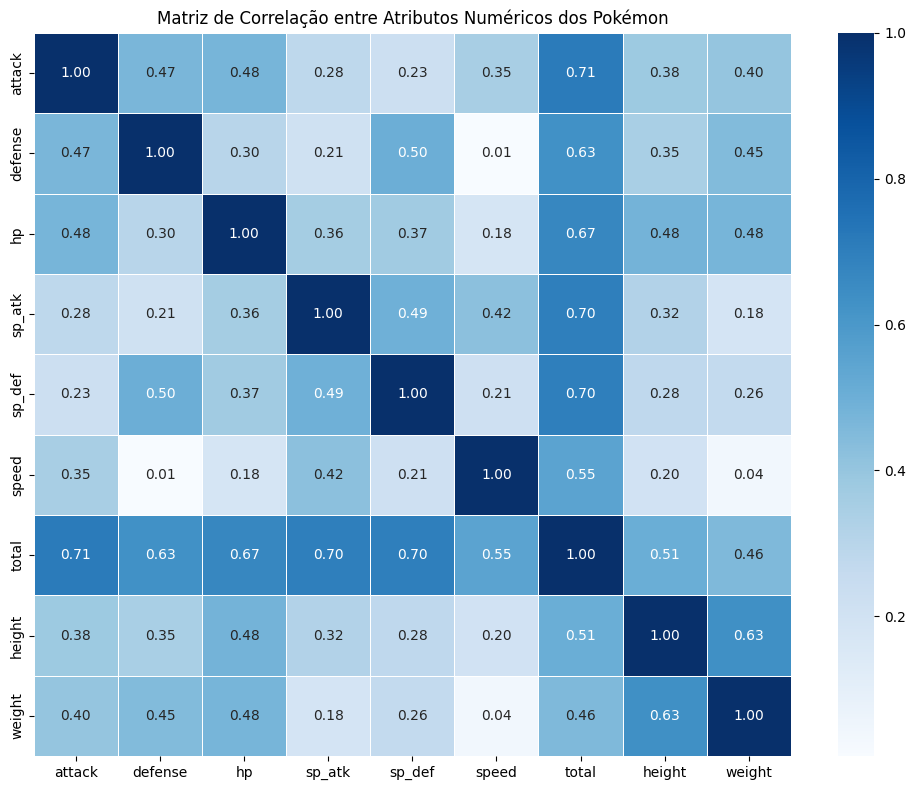

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona apenas as colunas numéricas relevantes
numeric_cols = ['attack', 'defense', 'hp', 'sp_atk', 'sp_def', 'speed', 'total', 'height', 'weight']

# Calcula a matriz de correlação
corr_matrix = basicdf[numeric_cols].corr()

# Exibe a matriz de correlação como um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Atributos Numéricos dos Pokémon')
plt.tight_layout()
os.makedirs('./charts/stats-correlation', exist_ok=True)
plt.savefig('./charts/stats-correlation/matriz_correlacao_pokemon.png')
plt.show()

## Analises com Inteligência Artificial